In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from IPython.core.debugger import Pdb

df= pd.read_csv("/kaggle/input/random-linear-regression/train.csv")
test_df= pd.read_csv('/kaggle/input/random-linear-regression/test.csv')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.columns
df.shape
df.head
# df = df.dropna(subset=['y'])
df.dropna(inplace=True)


In [3]:
x= df['x'].values
x=np.array(x).reshape((-1,1))
y=df['y']

<AxesSubplot: xlabel='x', ylabel='Count'>

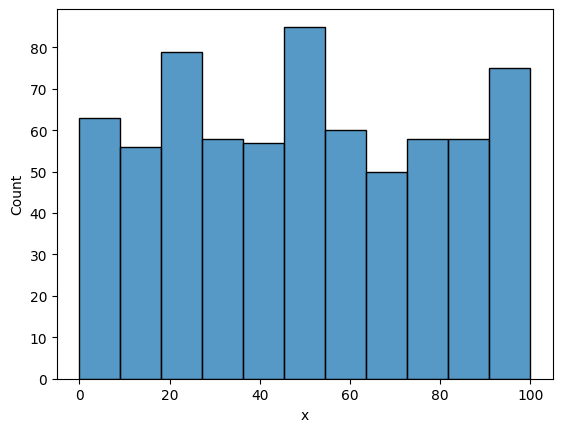

In [4]:
sns.histplot(df['x'])

Assessing the assumptions of linear regression involves checking whether certain assumptions hold true for the model. Here's an explanation of the key assumptions and how you can evaluate them:

Linearity: The linearity assumption in linear regression states that the relationship between the independent variables (features) and the dependent variable (target) is linear. You can assess this assumption by examining scatter plots of each independent variable against the dependent variable.

<AxesSubplot: xlabel='x', ylabel='y'>

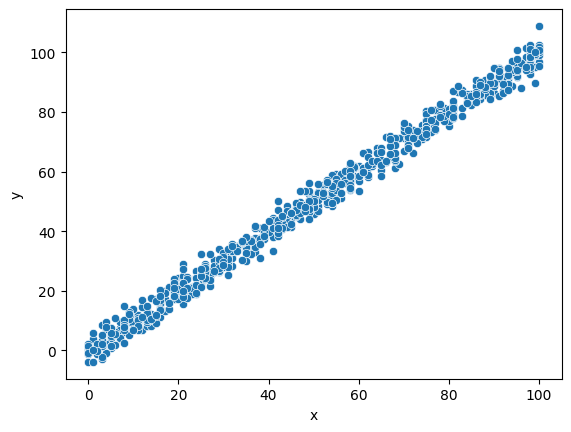

In [5]:

sns.scatterplot(data= df, x="x", y="y")


**Preparing test_df**


In [6]:
test_df_x= np.array(test_df['x']).reshape((-1,1))
test_df_y= np.array(test_df['y']).reshape((-1,1))

In [7]:
model= LinearRegression()
model.fit(x,y)
r_sq= model.score(x,y)
print( f'the value of the coefficient is: {model.coef_}')
print(f'the value of the intercept is:{model.intercept_}')
print(f"coefficient of determination: {r_sq}")

the value of the coefficient is: [1.00065638]
the value of the intercept is:-0.10726546430097272
coefficient of determination: 0.9907015319025518


In [8]:
pred=model.predict(test_df_x)
# Pdb().set_trace()
mse= mean_squared_error(pred, test_df_y)
mae= mean_absolute_error(pred,test_df_y)
print(f'The value of mean squared error is: {mse}')
print (f'The value of mean absolute error is: {mae}')

The value of mean squared error is: 9.432922192039305
The value of mean absolute error is: 2.415771850041258


(300,)
(300, 1)
(300,)


<AxesSubplot: >

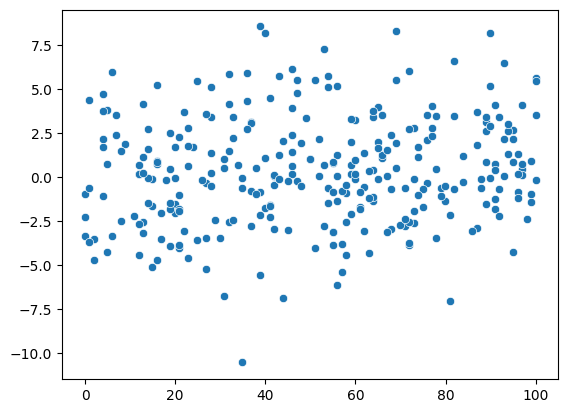

In [9]:
residuals = test_df_y.flatten() - pred
print(pred.shape)
print(test_df_y.shape)
print(residuals.shape)
sns.scatterplot(x=pred, y=residuals)

Normality of Residuals: The normality assumption assumes that the residuals follow a normal distribution with a mean of zero. You can check the normality of residuals using a histogram, a Q-Q plot, or a statistical test such as the Shapiro-Wilk test. If the residuals deviate significantly from a normal distribution, it may indicate a violation of the assumption.

<AxesSubplot: ylabel='Count'>

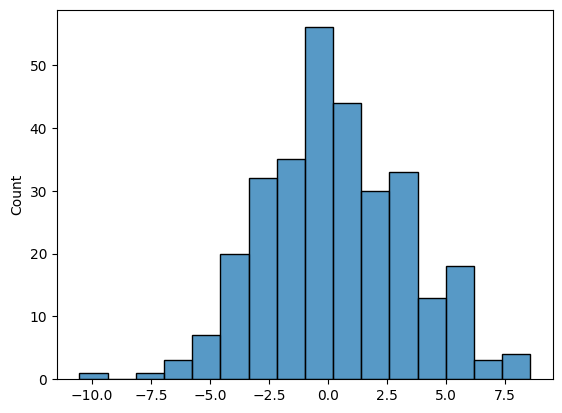

In [10]:
sns.histplot(residuals)